In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)

Using TensorFlow backend.


In [4]:
Data = pd.read_csv('dataset/falldetection.csv')

In [5]:
Data.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [6]:
Data.dropna(inplace=True)

In [7]:
# Activity is the Target Label
# Time does not seem to be am important feature
# Before splitting the data into train test validation we would assume that the data we get would be cleaned

In [8]:
# Before using the data for training purpose we must check if the data is balanced

In [9]:
labelCounts = Data.groupby('ACTIVITY')['TIME'].count()

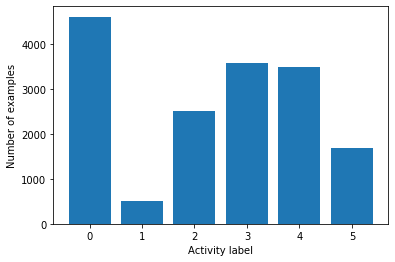

In [10]:
plt.bar(labelCounts.index,labelCounts.values)
plt.ylabel('Number of examples')
plt.xlabel('Activity label')
plt.show()

#### Here as we can see the data is imbalanced, thus we must resort to Oversampling or Undersampling technique in this scenario, number of values for one of the activity label is really low so we would choose oversampling over undersampling as we need enough data points for each label for appropriate training

In [11]:
def sampling(X,y,sample='oversample'):
    if sample=='oversample':
        X_resampled, y_resampled = ros.fit_resample(X, y)
    else:
        X_resampled, y_resampled = rus.fit_resample(X, y)
        
    return X_resampled,y_resampled

In [12]:
features = ['SL','EEG','BP','HR','CIRCLUATION']

In [13]:
for i in features:
    IQR = Data[i].quantile(0.75) - Data[i].quantile(0.25)
    Data = Data[(Data[i]< (Data[i].quantile(0.75)+IQR)) & (Data[i] > (Data[i].quantile(0.25)-IQR))]


In [14]:
Feature_Data = Data.loc[:,features]

In [15]:
X_resampled, Y_resampled = sampling(Feature_Data,Data['ACTIVITY'])

In [16]:
# test_size = 0.25 means we would want to split the data into 75% train and 25% test

In [17]:
X_Train, X_Test, y_train, y_test = train_test_split(X_resampled, Y_resampled,test_size=0.25)

### Now we can do two things 
### 1. Split the train data further into train and validate - This is something we can do when we have a good number of data points 
### 2. Evaluate models on the cross_val_score on the train data



##### We would be evaluating only Random Forest Classifier based on accuracy score

#### Approach 1

In [18]:
TrainX, ValidateX, TrainY, ValidateY = train_test_split(X_Train,y_train,test_size=0.25)

In [19]:
rf = RandomForestClassifier()

In [20]:
rf.fit(TrainX,TrainY)

RandomForestClassifier()

In [21]:
y_predict_valid = rf.predict(ValidateX)

In [22]:
accuracy_score(ValidateY,y_predict_valid)

0.8342985842985843

#### This is the accuracy on the validation data, and we would pick the model with the best score ( depending on the metric accuracy in this case) on the validation dataset

#### There is a small problem with this approach, what if our validation sample is biased towards a certain target label 

#### In order to avoid this we would resort to cross validation and evaluate the model on the cross validation score 

#### Approach 2

In [23]:
# Cross Validation for Random Forest Classifier 

from sklearn.model_selection import cross_val_score
rf1 = RandomForestClassifier()
scores = cross_val_score(rf1, X_Train, y_train, cv=5)

In [24]:
scores.mean()

0.8312024682285184

#### We get result in both approach to be somewhat the same 